In [2]:
import pandas as pd
data = pd.read_csv('Mall_Customers.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [4]:
x = pd.DataFrame(data)

# Converter a coluna 'Gender' para string, remover espaços em branco e converter para minúsculas
x['Gender'] = x['Gender'].astype(str).str.strip().str.lower()

# Codificar a coluna 'Gender'
x['Gender'] = x['Gender'].map({'male': 0, 'female': 1})

# Verificar se o mapeamento funcionou corretamente
x['Gender']

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [5]:
# Separar as características (features) e os rótulos (labels)
y = (data['Spending Score (1-100)'] > 50).astype(int).values
# Os maiores que 50 terão 1 e os menores terão 0 como valor


limite = 70
# Função para discretizar os valores
def discretizar(valor):
    if valor <= limite:
        return 0
    else:
        return 1

# Aplicar a função à coluna 'valores' usando o método apply
x['Annual Income (k$)_discretizados'] = x['Annual Income (k$)'].apply(discretizar)
limite = 28
x['Age_discretizados'] = x['Age'].apply(discretizar)

x = x.drop(['Annual Income (k$)', 'Age', 'Spending Score (1-100)', 'CustomerID'], axis=1)


In [6]:
x

,Gender,Annual Income (k$)_discretizados,Age_discretizados
0,0,0,0
1,0,0,0
2,1,0,0
3,1,0,0
4,1,0,1
...,...,...,...
195,1,1,1
196,1,1,1
197,0,1,1
198,0,1,1


In [7]:
y = pd.DataFrame(y)
y

,0
0,0
1,1
2,0
3,1
4,0
...,...
195,1
196,0
197,1
198,0


In [8]:
# Dividindo treino e teste com sklearn

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# test size: Proporção ou número absoluto de amostras que irão compor o conjunto de teste. Pode ser um float entre 0.0 e 1.0.
# Random state: Define a semente usada pelo gerador de números aleatórios. Isso é útil para garantir que a divisão dos dados seja reprodutível. 
#Um valor inteiro fixa a semente, permitindo que você obtenha os mesmos conjuntos de treino e teste em execuções diferentes.

In [44]:
import tensorflow as tf

# Define a semente aleatória para garantir a reprodutibilidade dos resultados
tf.random.set_seed(2)
# Isso é importante para garantir que os resultados das operações que envolvem aleatoriedade sejam reprodutíveis. 
# Quando você define uma semente aleatória, qualquer operação aleatória que você executar 
# (como inicialização de pesos, embaralhamento de dados, ou divisão de dados em lotes) produzirá os mesmos resultados a cada vez que o código for executado.

# CRIANDO A ESTRUTURA DA REDE NEURAL SEQUENCIAL
# As redes neurais podem ter diferentes tipos de camadas, como:
# - Camadas densas (totalmente conectadas), usadas frequentemente em redes neurais feedforward.
# - Camadas convolucionais, usadas principalmente em CNNs para tarefas de visão computacional.
# - Camadas recorrentes, usadas em RNNs para processamento de sequências, como em NLP.
# - E outros tipos de camadas, dependendo da necessidade.

# CAMADA DE ENTRADA
# Define a camada de entrada, passando uma tupla com o tamanho das entradas.
inp = tf.keras.Input((x_train.shape[1],))  # x_train.shape[1] é o número de colunas do nosso dataset.

# CAMADAS OCULTAS
# Camada oculta com 100 neurônios e função de ativação 'relu'
# ReLU(x) = max(0, x): Para uma entrada x, a saída será x se x for maior que 0; caso contrário, a saída será 0.
hide = tf.keras.layers.Dense(100, activation='relu')(inp)

# CAMADA DE SAÍDA
# Camada de saída com 1 neurônio e função de ativação 'sigmoid'
# A função sigmoid é usada para transformar a saída em um valor entre 0 e 1.
out = tf.keras.layers.Dense(1, activation='sigmoid')(hide)

# CRIAÇÃO DO MODELO
# Cria o modelo especificando as entradas e saídas
modelo = tf.keras.Model(inputs=inp, outputs=out)
# No Keras, existem 2 objetos principais para criar redes neurais: Sequential e Model (para redes mais complexas).

# COMPILAÇÃO DO MODELO
# Compila o modelo com o otimizador 'adam' e a função de perda 'msle'
# 'adam' é um otimizador eficiente de primeira ordem.
# 'msle' (Mean Squared Logarithmic Error) é uma função de perda adequada para dados com grandes variâncias.
modelo.compile(optimizer='adam', loss='msle')

# VISUALIZAÇÃO DO MODELO
# Exibe um resumo da arquitetura do modelo
modelo.summary()

# TREINAMENTO DO MODELO
# Treina o modelo nos dados de treinamento
historico = modelo.fit(
    x_train, y_train,
    #validation_data=(, ),             # Dados de validação, caso não use 'validation_split'. Caso tanha dividido antes.
    epochs=40,                        # Número de épocas
    shuffle=True,                      # Embaralha os dados a cada época
    batch_size=1,                      # Tamanho do lote
    validation_split=0.2              # Fração dos dados de treinamento usada como validação
)
# Batch size: Tamanho dos lotes em que os dados são divididos para treinamento.
# Epochs: Número de passadas completas sobre o conjunto de dados.
# Shuffle: Torna a ordem dos dados aleatória a cada época para melhorar a generalização.


Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 100)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 501 (1.96 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1241 - val_loss: 0.1193
Epoch 2/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1208 - val_loss: 0.1178
Epoch 3/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1196 - val_loss: 0.1170
Epoch 4/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1186 - val_loss: 0.1163
Epoch 5/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1178 - val_loss: 0.1158
Epoch 6/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1171 - val_loss: 0.1154
Epoch 7/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1166 - val_loss: 0.1151
Epoch 8/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1161 - val_loss: 0.1147
Epoch 9/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1158 - val_loss: 0.1146
Epoch 10/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1155 - val_loss: 0.1143
Epoch 11/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1151 - val_loss: 0.1141
Epoch 12/40
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

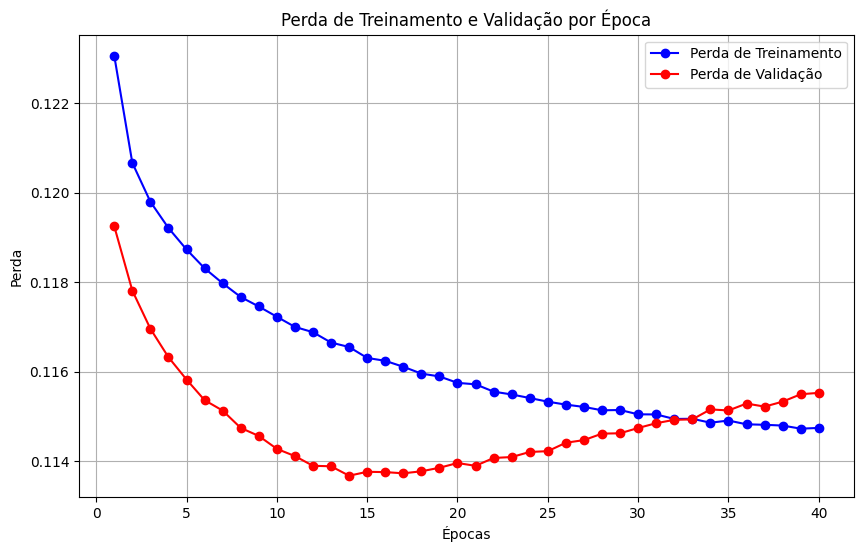

In [45]:
import matplotlib.pyplot as plt

loss = historico.history['loss']
val_loss = historico.history['val_loss']  # Se você também tem dados de validação
epochs = range(1, len(loss) + 1)

# Plotando o gráfico da perda
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'bo-', label='Perda de Treinamento')  # 'bo-' é para marcar os pontos com bolinhas azuis
plt.plot(epochs, val_loss, 'ro-', label='Perda de Validação')  # 'ro-' é para marcar os pontos com bolinhas vermelhas
plt.title('Perda de Treinamento e Validação por Época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)
plt.show()

# LOSS DE TREINAMENTO
#A loss de treinamento é a medida do erro do modelo nos dados de treinamento durante cada época do treinamento.
#Ela é usada pelo otimizador para ajustar os pesos da rede neural durante o treinamento, com o objetivo de minimizá-la.
#Espera-se que a loss de treinamento diminua ao longo das épocas. Isso indica que o modelo está aprendendo com sucesso os padrões nos dados de treinamento.

# LOSS DE VALIDAÇÃO
# A loss de validação é a medida do erro do modelo em um conjunto de dados de validação, que são dados que o modelo não viu durante o treinamento.
# Ela é usada para avaliar a capacidade do modelo de generalizar para dados não vistos e detectar overfitting.
# Idealmente, a loss de validação deve diminuir à medida que o modelo aprende com os dados de treinamento, mas depois pode começar a aumentar. Isso é normal e esperado, pois indica que o modelo está começando a se ajustar demais aos dados de treinamento e perdendo a capacidade de generalizar para novos dados.
#Quando o modelo está se ajustando demais (overfitting), 
#ele está se tornando muito específico para os dados de treinamento e perdendo a capacidade de generalização para dados não vistos.
